# Text Mining: Project 1

**Group members:**
* Contadini Alice 
* Nguyen Thien 
* Uslu Yasemin 

**Assigned character:** Leonard

In [1]:
# Importing packages
import pandas as pd
import string
import nltk
import re
import io
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")
import sklearn
import numpy as np
import transformers
from collections import defaultdict

from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
nltk.download('punkt') 
from nltk import pos_tag
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from transformers import AutoTokenizer, AutoModelForTokenClassification, TokenClassificationPipeline
from transformers import pipeline

c:\Users\camd1\miniconda3\envs\textmining2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\camd1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Importing dataset
path = 'Scripts TBBT.csv'
df = pd.read_csv(path, sep = ",", skipinitialspace=True, engine="python")
len(df) # number of dialogues in complete dataset with all characters

54406

In [3]:
# Filter dataset (only Leonard)
leonard_df = df[df['person_scene'] == 'Leonard'].copy()

# Extracting season and episode numbers using regular expressions
leonard_df[['season', 'episode']] = leonard_df['episode_name'].str.extract(r'Series (\d+) Episode (\d+)')

leonard_df.head()

,episode_name,dialogue,person_scene,season,episode
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,01,01
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,01,01
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,01,01
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard,01,01
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard,01,01


# Question 1
On average, how many sentences and words does your character have to speak per episode? Does this deviate across seasons?

In [4]:
# Total number of dialogues of Leonard
len(leonard_df)

9638

In [5]:
# Number of sentences in each dialogue (row)
leonard_df['num_sentences'] = leonard_df['dialogue'].apply(lambda x: len(sent_tokenize(str(x))))
leonard_df.head()

,episode_name,dialogue,person_scene,season,episode,num_sentences
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,01,01,1
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,01,01,1
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,01,01,3
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard,01,01,2
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard,01,01,2


In [6]:
def remove_punctuation(text):
    punctuations = set('!“#$%&()*+,-.:;?@[]^‘’{|}~...')
    
    # Replace ellipsis with space
    text = text.replace("\u2026", ' ')
    
    for char in punctuations:
        text = text.replace(char, ' ')
    
    return text


# Remove punctuation from dialogues
leonard_df['dialogue_no_punct'] = leonard_df['dialogue'].apply(remove_punctuation) # New column with clean dialogues
leonard_df.head(50)

,episode_name,dialogue,person_scene,season,episode,num_sentences,dialogue_no_punct
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,01,01,1,Agreed what s your point
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,01,01,1,Excuse me
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,01,01,3,One across is Aegean eight down is Nabakov ...
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard,01,01,2,Yes Um is this the High IQ sperm bank
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard,01,01,2,Thank you We ll be right back
15,Series 01 Episode 01 – Pilot Episode,"What, are you kidding? You’re a semi-pro.",Leonard,01,01,2,What are you kidding You re a semi pro
17,Series 01 Episode 01 – Pilot Episode,"Sheldon, this was your idea. A little extra m...",Leonard,01,01,2,Sheldon this was your idea A little extra m...
19,Series 01 Episode 01 – Pilot Episode,I’m sure she’ll still love him.,Leonard,01,01,1,I m sure she ll still love him
21,Series 01 Episode 01 – Pilot Episode,"Well, what do you want to do?",Leonard,01,01,1,Well what do you want to do
23,Series 01 Episode 01 – Pilot Episode,Okay.,Leonard,01,01,1,Okay


In [7]:
leonard_df['dialogue_no_punct_lower'] = leonard_df['dialogue_no_punct'].apply(lambda x: x.lower())
leonard_df.head()

,episode_name,dialogue,person_scene,season,episode,num_sentences,dialogue_no_punct,dialogue_no_punct_lower
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,01,01,1,Agreed what s your point,agreed what s your point
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,01,01,1,Excuse me,excuse me
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,01,01,3,One across is Aegean eight down is Nabakov ...,one across is aegean eight down is nabakov ...
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard,01,01,2,Yes Um is this the High IQ sperm bank,yes um is this the high iq sperm bank
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard,01,01,2,Thank you We ll be right back,thank you we ll be right back


In [8]:
# Number of words per dialogue (row)
leonard_df['num_words'] = leonard_df['dialogue_no_punct'].apply(lambda x: len(word_tokenize(str(x)))) # word tokenization
leonard_df.head()

,episode_name,dialogue,person_scene,season,episode,num_sentences,dialogue_no_punct,dialogue_no_punct_lower,num_words
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,01,01,1,Agreed what s your point,agreed what s your point,5
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,01,01,1,Excuse me,excuse me,2
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,01,01,3,One across is Aegean eight down is Nabakov ...,one across is aegean eight down is nabakov ...,39
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard,01,01,2,Yes Um is this the High IQ sperm bank,yes um is this the high iq sperm bank,9
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard,01,01,2,Thank you We ll be right back,thank you we ll be right back,7


In [9]:
# Sentences per episode
sentences_per_episode = leonard_df.groupby('episode_name')['num_sentences'].sum().reset_index()
sentences_per_episode

,episode_name,num_sentences
0,Series 01 Episode 01 – Pilot Episode,164
1,Series 01 Episode 02 – The Big Bran Hypothesis,116
2,Series 01 Episode 03 – The Fuzzy Boots Corollary,156
3,Series 01 Episode 04 – The Luminous Fish Effect,62
4,Series 01 Episode 05 – The Hamburger Postulate,94
...,...,...
226,Series 10 Episode 20 – The Recollection Dissip...,21
227,Series 10 Episode 21 – The Separation Agitation,28
228,Series 10 Episode 22 – The Cognition Regeneration,56
229,Series 10 Episode 23 – The Gyroscopic Collapse,34


In [10]:
# Average sentences per episode 
avg_sentences_per_episode = sentences_per_episode['num_sentences'].mean()
avg_sentences_per_episode

61.926406926406926

In [11]:
# Words per episode
words_per_episode = leonard_df.groupby('episode_name')['num_words'].sum().reset_index()
words_per_episode

,episode_name,num_words
0,Series 01 Episode 01 – Pilot Episode,1171
1,Series 01 Episode 02 – The Big Bran Hypothesis,968
2,Series 01 Episode 03 – The Fuzzy Boots Corollary,1399
3,Series 01 Episode 04 – The Luminous Fish Effect,410
4,Series 01 Episode 05 – The Hamburger Postulate,725
...,...,...
226,Series 10 Episode 20 – The Recollection Dissip...,154
227,Series 10 Episode 21 – The Separation Agitation,148
228,Series 10 Episode 22 – The Cognition Regeneration,507
229,Series 10 Episode 23 – The Gyroscopic Collapse,283


In [12]:
# Average words per episode 
avg_words_per_episode = words_per_episode['num_words'].mean()
avg_words_per_episode

435.6277056277056

In [13]:
leonard_df['season_nr'] = leonard_df['episode_name'].str.extract(r'Series (\d+)')
leonard_df['season_nr'] = leonard_df['season_nr'].astype(float)

sentences_per_season_episode = leonard_df.groupby(['season_nr', 'episode_name'])['num_sentences'].sum().reset_index()
words_per_season_episode = leonard_df.groupby(['season_nr', 'episode_name'])['num_words'].sum().reset_index()

# Average sentences per season-episode
avg_sentences_per_season = sentences_per_season_episode.groupby('season_nr')['num_sentences'].mean().reset_index()

# Average words per season-episode
avg_words_per_season = words_per_season_episode.groupby('season_nr')['num_words'].mean().reset_index()

In [14]:
print("Average Leonard's sentences per episode:", round(avg_sentences_per_episode))
print("Average Leonard's sentences per season-episode:", round(avg_sentences_per_season))
print("Average Leonard's words per episode:", round(avg_words_per_episode))
print("Average Leonard's words per season-episode:", round(avg_words_per_season))

Average Leonard's sentences per episode: 62
Average Leonard's sentences per season-episode:    season_nr  num_sentences
0        1.0           92.0
1        2.0           79.0
2        3.0           76.0
3        4.0           67.0
4        5.0           61.0
5        6.0           53.0
6        7.0           54.0
7        8.0           54.0
8        9.0           50.0
9       10.0           44.0
Average Leonard's words per episode: 436
Average Leonard's words per season-episode:    season_nr  num_words
0        1.0      712.0
1        2.0      544.0
2        3.0      509.0
3        4.0      422.0
4        5.0      420.0
5        6.0      367.0
6        7.0      389.0
7        8.0      397.0
8        9.0      352.0
9       10.0      333.0


## Answer 1: 
In order to answer Question 1, we performed sentence and word tokenization, and removed the punctuation from the dialogues.

On average, Leonard speaks around 62 sentences or 436 words per episode across all seasons. When looking at the average sentences and words for each season separately, the results indicate that these averages do deviate across seasons. More specifically, Leonard speaks less sentences and words per episode as each season goes by. In season 1, Leonard has an average of 92 sentences and 713 words. By season 10, his average number of sentences per episode has dropped to 44, and his average number of words has gone down to 333 words per episode. 


# Question 2
Globally, over all episodes within the first 10 seasons, how many times does your
character mention nouns, and person names? Make a Wordcloud of this tag/entity to
have a clear visualization which nouns/person names are mostly used by your character.

In [15]:
# Lowercase
leonard_df['dialogue_no_punct_lower'] = leonard_df['dialogue_no_punct'].apply(lambda x: x.lower())

leonard_df.head()

,episode_name,dialogue,person_scene,season,episode,num_sentences,dialogue_no_punct,dialogue_no_punct_lower,num_words,season_nr
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,01,01,1,Agreed what s your point,agreed what s your point,5,1.0
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,01,01,1,Excuse me,excuse me,2,1.0
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,01,01,3,One across is Aegean eight down is Nabakov ...,one across is aegean eight down is nabakov ...,39,1.0
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard,01,01,2,Yes Um is this the High IQ sperm bank,yes um is this the high iq sperm bank,9,1.0
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard,01,01,2,Thank you We ll be right back,thank you we ll be right back,7,1.0


In [16]:
# Word tokenization 
leonard_df['tokens'] = leonard_df['dialogue_no_punct_lower'].apply(word_tokenize)
leonard_df.head()

,episode_name,dialogue,person_scene,season,episode,num_sentences,dialogue_no_punct,dialogue_no_punct_lower,num_words,season_nr,tokens
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,01,01,1,Agreed what s your point,agreed what s your point,5,1.0,"[agreed, what, s, your, point]"
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,01,01,1,Excuse me,excuse me,2,1.0,"[excuse, me]"
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,01,01,3,One across is Aegean eight down is Nabakov ...,one across is aegean eight down is nabakov ...,39,1.0,"[one, across, is, aegean, eight, down, is, nab..."
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard,01,01,2,Yes Um is this the High IQ sperm bank,yes um is this the high iq sperm bank,9,1.0,"[yes, um, is, this, the, high, iq, sperm, bank]"
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard,01,01,2,Thank you We ll be right back,thank you we ll be right back,7,1.0,"[thank, you, we, ll, be, right, back]"


In [17]:
# Remove stopwords
stop_words = set(stopwords.words('english')) 
 
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

leonard_df['tokens_no_stop'] = leonard_df['tokens'].apply(remove_stopwords) 
leonard_df['dialogue_no_stop'] = leonard_df['tokens_no_stop'].apply(lambda tokens: ' '.join(tokens))

leonard_df.head()

,episode_name,dialogue,person_scene,season,episode,num_sentences,dialogue_no_punct,dialogue_no_punct_lower,num_words,season_nr,tokens,tokens_no_stop,dialogue_no_stop
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,01,01,1,Agreed what s your point,agreed what s your point,5,1.0,"[agreed, what, s, your, point]","[agreed, point]",agreed point
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,01,01,1,Excuse me,excuse me,2,1.0,"[excuse, me]",[excuse],excuse
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,01,01,3,One across is Aegean eight down is Nabakov ...,one across is aegean eight down is nabakov ...,39,1.0,"[one, across, is, aegean, eight, down, is, nab...","[one, across, aegean, eight, nabakov, twenty, ...",one across aegean eight nabakov twenty six acr...
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard,01,01,2,Yes Um is this the High IQ sperm bank,yes um is this the high iq sperm bank,9,1.0,"[yes, um, is, this, the, high, iq, sperm, bank]","[yes, um, high, iq, sperm, bank]",yes um high iq sperm bank
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard,01,01,2,Thank you We ll be right back,thank you we ll be right back,7,1.0,"[thank, you, we, ll, be, right, back]","[thank, right, back]",thank right back


We can see that there are still some stopwords in the dialogues, such as 'um'. These are manually removed by adding them to the stopwords list.

In [18]:
# Custom stop words
custom_stop_words = set(stopwords.words('english') + ['um'] + ['well'] + ['okay'] + ['uh'] + ['oh'] + ['yes'])

# Remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in custom_stop_words]

leonard_df['tokens_no_stop'] = leonard_df['tokens'].apply(remove_stopwords)
leonard_df['dialogue_no_stop'] = leonard_df['tokens_no_stop'].apply(lambda tokens: ' '.join(tokens))

leonard_df.head(50)

,episode_name,dialogue,person_scene,season,episode,num_sentences,dialogue_no_punct,dialogue_no_punct_lower,num_words,season_nr,tokens,tokens_no_stop,dialogue_no_stop
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,01,01,1,Agreed what s your point,agreed what s your point,5,1.0,"[agreed, what, s, your, point]","[agreed, point]",agreed point
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,01,01,1,Excuse me,excuse me,2,1.0,"[excuse, me]",[excuse],excuse
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,01,01,3,One across is Aegean eight down is Nabakov ...,one across is aegean eight down is nabakov ...,39,1.0,"[one, across, is, aegean, eight, down, is, nab...","[one, across, aegean, eight, nabakov, twenty, ...",one across aegean eight nabakov twenty six acr...
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard,01,01,2,Yes Um is this the High IQ sperm bank,yes um is this the high iq sperm bank,9,1.0,"[yes, um, is, this, the, high, iq, sperm, bank]","[high, iq, sperm, bank]",high iq sperm bank
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard,01,01,2,Thank you We ll be right back,thank you we ll be right back,7,1.0,"[thank, you, we, ll, be, right, back]","[thank, right, back]",thank right back
15,Series 01 Episode 01 – Pilot Episode,"What, are you kidding? You’re a semi-pro.",Leonard,01,01,2,What are you kidding You re a semi pro,what are you kidding you re a semi pro,9,1.0,"[what, are, you, kidding, you, re, a, semi, pro]","[kidding, semi, pro]",kidding semi pro
17,Series 01 Episode 01 – Pilot Episode,"Sheldon, this was your idea. A little extra m...",Leonard,01,01,2,Sheldon this was your idea A little extra m...,sheldon this was your idea a little extra m...,17,1.0,"[sheldon, this, was, your, idea, a, little, ex...","[sheldon, idea, little, extra, money, get, fra...",sheldon idea little extra money get fractional...
19,Series 01 Episode 01 – Pilot Episode,I’m sure she’ll still love him.,Leonard,01,01,1,I m sure she ll still love him,i m sure she ll still love him,8,1.0,"[i, m, sure, she, ll, still, love, him]","[sure, still, love]",sure still love
21,Series 01 Episode 01 – Pilot Episode,"Well, what do you want to do?",Leonard,01,01,1,Well what do you want to do,well what do you want to do,7,1.0,"[well, what, do, you, want, to, do]",[want],want
23,Series 01 Episode 01 – Pilot Episode,Okay.,Leonard,01,01,1,Okay,okay,1,1.0,[okay],[],


In [19]:
# POS tagging & NER
def extract_entities(tokens):
    entities = {'nouns': [], 'persons': []}
    doc = nlp(" ".join(tokens))
    for token in doc:
        if token.pos_ == 'NOUN' and token.ent_type_ != 'PERSON':
            entities['nouns'].append(token.lemma_)
        elif token.ent_type_ == 'PERSON':
            entities['persons'].append(token.text)
    return entities

leonard_df['entities'] = leonard_df['tokens_no_stop'].apply(extract_entities)

# Flatten the lists of nouns and persons
all_nouns = [noun for sublist in leonard_df['entities'].apply(lambda x: x['nouns']) for noun in sublist]
all_persons = [person for sublist in leonard_df['entities'].apply(lambda x: x['persons']) for person in sublist]

The words that were classified as nouns and person names are not entirely correct. We manually remove a few that stand out as wrong. 

In [20]:
# We manually remove some wrongly classified words
not_nouns = ["sheldon", "penny", "psst", "co", "lot", "talk", "call", "know"]
all_nouns = [noun for noun in all_nouns if noun not in not_nouns]
not_persons = ["ho", "yo", "mm", "come", "want", "little", "need", "relax", "reason", "long", "make", "hey", "tell", "talking", "knoks", "hang", "sorry", 
               "listen", "hmm", "cousin", "sister", "cool", "bisexual", "hell", "kinda", "rider", "head", "bag", "mmm", "hee", "talk", "cinnamon", "night",
              "right", "bad", "fine", "lesbian", "know", "moo", "boy", "huh", "time", "nye", "na", "buh", "terrific", "heard"]
all_persons = [noun for noun in all_persons if noun not in not_persons]

For comparison, we also implemented two BERT-based models for this task. Here, we observe that these models works almost perfectly. However, there exist an issue with the autotokenizer for the second model, resulting in some words being splitted with ##. We will not further discuss the results from these models.

In [21]:
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

def extract_persons(tokens):
    persons = []
    ner_persons = nlp(tokens)
    for result in ner_persons:
        if result['entity'] == 'B-PER':
            persons.append(result['word'])
    return persons

leonard_df['persons_bert'] = leonard_df['dialogue'].apply(extract_persons)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
tokenizer = AutoTokenizer.from_pretrained("QCRI/bert-base-multilingual-cased-pos-english")
model = AutoModelForTokenClassification.from_pretrained("QCRI/bert-base-multilingual-cased-pos-english")
nlp = TokenClassificationPipeline(model=model, tokenizer=tokenizer)

def extract_nouns(tokens):
    nouns = []
    pos_nouns = nlp(tokens)
    for result in pos_nouns:
        if result['entity'] == 'NN':
            nouns.append(result['word'])
    return nouns

leonard_df['nouns_bert'] = leonard_df['dialogue'].apply(extract_nouns)

Some weights of the model checkpoint at QCRI/bert-base-multilingual-cased-pos-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [31]:
sample = leonard_df.loc[:, ['dialogue', 'entities', 'persons_bert', 'nouns_bert']].sample(10)
print(sample)

                                                dialogue  \
10556                      So, what’s going on with Raj?   
791                                             Nothing.   
4618                                            Why not?   
38347                                              What?   
295     And you were right about my motives, I was ho...   
11072   So, Penny doesn’t want me around her friends,...   
29776                            Nope, just, just, whoa.   
38731                                       Oh-hom yeah.   
47664   You know, you don’t need to use Sheldon to ge...   
22464                                                No.   

                                                entities persons_bert  \
10556                       {'nouns': [], 'persons': []}        [Raj]   
791                         {'nouns': [], 'persons': []}           []   
4618                        {'nouns': [], 'persons': []}           []   
38347                       {'nouns': [], 'pers

We have to consider that there are still errors in how the words were tagged, but from the obtained results Leonard mentioned 3101 unique nouns for a total of 12580 times and 446 unique person names for a total of 972 times.

We now generate word clouds to visualize the most frequently used nouns and person names.  
**Note: the file Sabandija-font-ffp.ttf must be in you directory in order for the wordcloud to run.**

In [40]:
# Create a frequency distribution of nouns and persons
noun_freq = FreqDist(all_nouns)
person_freq = FreqDist(all_persons)

noun_freq_bert = FreqDist(leonard_df['nouns_bert'].apply(tuple))
person__bert_freq = FreqDist(leonard_df['persons_bert'].apply(tuple))

# Total counts
total_noun_mentions = sum(noun_freq.values())
total_person_mentions = sum(person_freq.values())

print(f'Total Noun Mentions: {total_noun_mentions}')
print(f'Total Person Mentions: {total_person_mentions}\n')

print(f'Total Unique Noun Mentions: {len(set(all_nouns))}')
print(f'Total Unique Person Mentions: {len(set(all_persons))}\n')

print(f'Total Noun Mentions (BERT): {sum(noun_freq_bert.values())}')
print(f'Total Person Mentions (BERT): {sum(person__bert_freq.values())}\n')

print(f'Total Unique Noun Mentions (BERT): {len(set(leonard_df["nouns_bert"].explode()))}')
print(f'Total Unique Person Mentions (BERT): {len(set(leonard_df["persons_bert"].explode()))}')

Total Noun Mentions: 12580
Total Person Mentions: 972

Total Unique Noun Mentions: 3101
Total Unique Person Mentions: 446

Total Noun Mentions (BERT): 9638
Total Person Mentions (BERT): 9638

Total Unique Noun Mentions (BERT): 7456
Total Unique Person Mentions (BERT): 8205


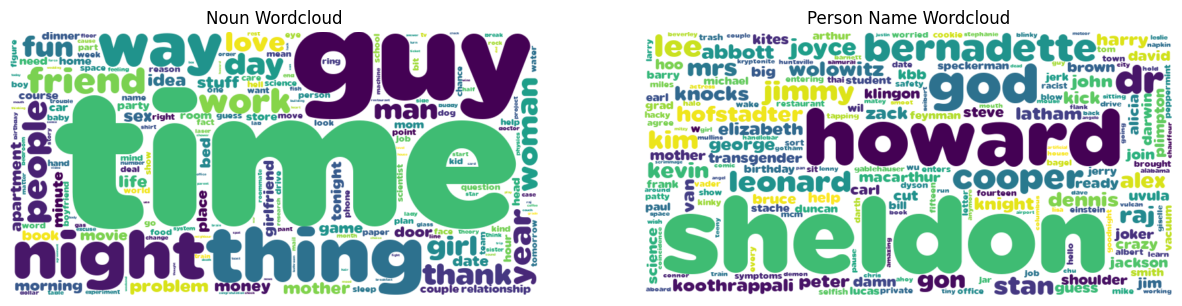

In [22]:
# Generate Wordclouds using the wordcloud library
noun_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='Sabandija-font-ffp.ttf',random_state=12).generate_from_frequencies(noun_freq)
person_wordcloud = WordCloud(width=800, height=400, background_color='white',font_path='Sabandija-font-ffp.ttf' ,random_state=12).generate_from_frequencies(person_freq)

# Plot the Wordclouds
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(noun_wordcloud, interpolation='bilinear')
plt.title('Noun Wordcloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(person_wordcloud, interpolation='bilinear')
plt.title('Person Name Wordcloud')
plt.axis('off')

plt.show()

According to wordclouds the 5 most frequent nouns are "time", "guy", "thing", "night" and "way", while the 5 most frequent person names are "sheldon", "howard", "god", "bernadette" and "dr". Notice that the classification is not perfect, mostly for person names.

# Question 3
What are the most important words mentioned by your character? Do this analysis per episode, per season and overall over the first 10 seasons. To achieve this task, please first make a bag-of-words and/or use the TF-IDF statistical principle. Remark: You can try to make a Wordcloud for visualization, based on the given bag-of-words.

For this question, we identified the documents and corpus of each level as follow:
1) per episode:
    documents = dialogues; corpus = episode
    
2) per season:
    documents = dialogues; corpus = season
    
3) overall over 10 seasons
    documents = dialogues; corpus = whole 10 seasons

In [29]:
# Remove '…' and '-'
leonard_df['dialogue'] = leonard_df['dialogue'].str.replace('…', '')
leonard_df['dialogue'] = leonard_df['dialogue'].str.replace('-', '')
# Tokenize and lowercase dialogues
leonard_df['tokenized'] = leonard_df['dialogue'].apply(lambda x: word_tokenize(str(x).lower()))

In [30]:
# Function to remove punctuation from tokenized data
def remove_punctuation(tokens):
    return [token for token in tokens if token not in string.punctuation and token != '’']

# Removing punctuation from tokenized data
leonard_df['no_punctuation'] = leonard_df['tokenized'].apply(remove_punctuation)

In [31]:
# Create sorted bag of words
def create_bow(corpus):    
    bow = set()
    for doc in corpus:
        bow = bow.union(set(doc))
    return sorted(bow)

# Find 10 most important words using TF-IDF
def imp_tf_idf(corpus, bow):
    # Calculate term frequency (TF)
    n_docs = len(corpus)         # Number of documents in the corpus
    n_words_set = len(bow)       # Number of unique words in the corpus

    # Initialize TF matrix
    tf_matrix = np.zeros((n_docs, n_words_set))

    for i in range(n_docs):
        n_words = len(corpus[i])    # Number of words in the document
        for w in corpus[i]:
            word_index = bow.index(w)
            tf_matrix[i][word_index] += 1 / n_words
        
    # Calculate Inverse Document Frequency (IDF)
    idf = np.zeros(n_words_set)
    for idx, w in enumerate(bow):
        k = sum(1 for doc in corpus if w in doc)
        idf[idx] = np.log10(n_docs / k) if k != 0 else 0

    # Calculate TF-IDF matrix
    tf_idf_matrix = tf_matrix * idf

    # Find most important words in the corpus by sorting the flattened TF-IDF matrix, then trace back to the bag of words
    flat_tf_idf = tf_idf_matrix.flatten()
    sorted_indices = np.argsort(flat_tf_idf)
    highest_indices = sorted_indices[-10:][::-1]
    highest_values = [bow[i // n_docs] for i in highest_indices]
    return highest_values


In [32]:
# Per episode: documents = dialogues; corpus = episode
result1 = []
for season in leonard_df['season'].unique():
    for episode in leonard_df[leonard_df['season'] == season]['episode'].unique():
        corpus = []
        for row in leonard_df[(leonard_df['season'] == season) & (leonard_df['episode'] == episode)].index:
            corpus.append(leonard_df['no_punctuation'][row])

        # Add words to result
        important_words = imp_tf_idf(corpus, create_bow(corpus))
        result1.append({'season': season, 'episode': episode, 'words': important_words})

result1 = pd.DataFrame(result1)
print(result1)

    season episode                                              words
0       01      01  [so, rest, don, good, behaves, based, colon, d...
1       01      02  [only, but, things, loud, leaves, talk, lets, ...
2       01      03  [you, prove, good, sub, right, quite, didn, wo...
3       01      04  [shake, give, apartment, day, slices, look, lo...
4       01      05  [weren, grow, or, research, hey, no, this, be,...
..     ...     ...                                                ...
226     10      20  [is, to, be, understood, be, pretend, plan, wh...
227     10      21  [of, go, have, t, that, until, any, might, reb...
228     10      22  [t, out, hi, and, doesn, still, thing, child, ...
229     10      23  [opportunity, doing, could, on, on, all, with,...
230     10      24  [follow, pool, ask, at, yeah, yeah, right, how...

[231 rows x 3 columns]


In [33]:
# per season: documents = dialogues; corpus = season
result2 = []
for season in leonard_df['season'].unique():
    corpus = []
    for row in leonard_df[(leonard_df['season'] == season)].index:
        corpus.append(leonard_df['no_punctuation'][row])
        
    # Add words to result
    result2.append({'season': season, 'words': imp_tf_idf(corpus, create_bow(corpus))})

result2 = pd.DataFrame(result2)
print(result2)

  season                                              words
0     01  [drink, off, stands, push, spare, cover, drive...
1     02  [racist, eye, come, dirty, miracle, sit, throu...
2     03  [discarded, standard, at, airplane, announce, ...
3     04  [quiz, fit, today, stuck, buddies, trying, yam...
4     05  [sweaty, leaving, rash, saturday, that, game, ...
5     06  [surprises, chided, no, dog, okay, saying, bec...
6     07  [how, seriously, inappropriate, audition, hone...
7     08  [situation, artistic, ladies, moth, grounds, b...
8     09  [ha, counsellor, try, calm, you, foreever, pot...
9     10  [tried, brought, snapchat, things, sorry, met,...


In [34]:
# whole: documents = dialogues; corpus = whole
corpus = []
for row in leonard_df.index:
    corpus.append(leonard_df['no_punctuation'][row])

# Add words to result
result3 = imp_tf_idf(corpus, create_bow(corpus))

result3 = pd.DataFrame(result3, columns=['words'])
print(result3)

          words
0      curtains
1          exam
2       haircut
3   introducing
4    insightful
5  dissertation
6         birth
7         world
8      nibbling
9     confident


# Question 4
 Examine the co-occurence of words for your character by using the Positive Pointwise Mutual Information measurement. Which words are commonly used together in
his/her dialogues? Remark: You can try to make a Word-Word co-occurence matrix.

The **word-word co-occurrence matrix** is created based on the tokens without stop words to reduce dimensionality.

In [35]:
# Creating the word-word co-occurence matrix
tokens_column = leonard_df['tokens_no_stop']

# Empty co-occurrence matrix
co_occurrence_matrix = {}

window_size = 2

# Iterate through each list of tokens in the column
for tokens in tokens_column:
    # Iterate through each word in the list of tokens
    for i, word in enumerate(tokens):
        # Define the context window
        start = max(0, i - window_size)
        end = min(len(tokens), i + window_size + 1)

        # Extract the context words
        context = tokens[start:i] + tokens[i+1:end]

        # Update the co-occurrence matrix
        if word not in co_occurrence_matrix:
            co_occurrence_matrix[word] = {}

        for neighbor in context:
            if neighbor not in co_occurrence_matrix[word]:
                co_occurrence_matrix[word][neighbor] = 0
            co_occurrence_matrix[word][neighbor] += 1

# Convert co-occurrence matrix to a df
co_occurrence_df = pd.DataFrame(co_occurrence_matrix).fillna(0)
print(co_occurrence_df)

            agreed  point  excuse  one  across  aegean  eight  nabakov  \
point          1.0    0.0     0.0  1.0     0.0     0.0    0.0      0.0   
flash          1.0    0.0     0.0  0.0     0.0     0.0    0.0      0.0   
change         1.0    0.0     0.0  0.0     0.0     0.0    0.0      0.0   
women          1.0    0.0     0.0  1.0     0.0     0.0    0.0      0.0   
technology     1.0    0.0     0.0  0.0     0.0     0.0    0.0      0.0   
...            ...    ...     ...  ...     ...     ...    ...      ...   
assless        0.0    0.0     0.0  0.0     0.0     0.0    0.0      0.0   
delicates      0.0    0.0     0.0  0.0     0.0     0.0    0.0      0.0   
separating     0.0    0.0     0.0  0.0     0.0     0.0    0.0      0.0   
paul           0.0    0.0     0.0  0.0     0.0     0.0    0.0      0.0   
bunyan         0.0    0.0     0.0  0.0     0.0     0.0    0.0      0.0   

            twenty  six  ...  arcadia  ibuprofen  ladders  depot  overly  \
point          0.0  0.0  ...      0

Next, the **Pointwise Mutual Information** measurement is calculated to examine the co-occurences.

In [36]:
# PMI 

def calculate_pmi(co_occurrence_df):
    co_occurrence_matrix = co_occurrence_df.to_numpy()
    words = co_occurrence_df.index.tolist()

    total_sum = np.sum(co_occurrence_matrix)
    row_sum = np.sum(co_occurrence_matrix, axis=1)
    col_sum = np.sum(co_occurrence_matrix, axis=0)

    for i in range(co_occurrence_matrix.shape[0]):
        for j in range(co_occurrence_matrix.shape[1]):
            co_occurrence_count = co_occurrence_matrix[i, j]

            if co_occurrence_count == 0:
                continue

            p_x_y = co_occurrence_count / total_sum
            p_x = row_sum[i] / total_sum
            p_y = col_sum[j] / total_sum

            pmi = np.log(p_x_y / (p_x * p_y)) # PMI formula 

            co_occurrence_df.iloc[i, j] = pmi

    return co_occurrence_df

In [37]:
# Calculate and print PMI matrix
co_occurrence_df_pmi = calculate_pmi(co_occurrence_df.copy())

print("PMI Matrix:")
print(co_occurrence_df_pmi)

PMI Matrix:
              agreed  point  excuse       one  across  aegean  eight  nabakov  \
point       3.896185    0.0     0.0  0.279144     0.0     0.0    0.0      0.0   
flash       5.368657    0.0     0.0  0.000000     0.0     0.0    0.0      0.0   
change      4.180814    0.0     0.0  0.000000     0.0     0.0    0.0      0.0   
women       3.704731    0.0     0.0  0.087689     0.0     0.0    0.0      0.0   
technology  5.643094    0.0     0.0  0.000000     0.0     0.0    0.0      0.0   
...              ...    ...     ...       ...     ...     ...    ...      ...   
assless     0.000000    0.0     0.0  0.000000     0.0     0.0    0.0      0.0   
delicates   0.000000    0.0     0.0  0.000000     0.0     0.0    0.0      0.0   
separating  0.000000    0.0     0.0  0.000000     0.0     0.0    0.0      0.0   
paul        0.000000    0.0     0.0  0.000000     0.0     0.0    0.0      0.0   
bunyan      0.000000    0.0     0.0  0.000000     0.0     0.0    0.0      0.0   

            twe

We take a look at the **10 highest and lowest PMI values** to check out the bounds and which words co-occur the most and least.

In [38]:
# Filter to show the 10 highest PMI values
top_10_pmi = co_occurrence_df_pmi.unstack().nlargest(10).reset_index()
print("Top 10 highest PMI values:")
print(top_10_pmi)

# Filter to show the 10 lowest PMI values
bottom_10_pmi = co_occurrence_df_pmi.unstack().nsmallest(10).reset_index()
print("\nBottom 10 lowest PMI values:")
print(bottom_10_pmi)

Top 10 highest PMI values:
                 level_0                level_1          0
0           substitution              reduction  11.678575
1              reduction           substitution  11.678575
2                    eta                  meson  11.678575
3                  meson                    eta  11.678575
4  anythingforagreencard                    com  11.678575
5                    com  anythingforagreencard  11.678575
6              reiterate                knuckle  11.678575
7                knuckle              reiterate  11.678575
8             saturnalia                miracle  11.678575
9                miracle             saturnalia  11.678575

Bottom 10 lowest PMI values:
  level_0 level_1         0
0    like      na -2.160503
1      na    like -2.160503
2     see    know -2.118221
3    know     see -2.118221
4    like     gon -2.057710
5     gon    like -2.057710
6    like     let -2.054857
7     let    like -2.054857
8     get    good -1.986015
9    good     

We can see that the bounds are around [-2.2;11.7], but these bounds are not fixed, because they depend on the probabilities we have. A big disadvantage is that these PMI values can take negative and positive values, and are very difficult to interpret due to these unfixed bounds, as well as due to its biasness towards infrequent words. 

Since the negative PMI values tend to be unreliable, we try a variation which is called the **Positive Pointwise Mutual Information** measurement. This variation deals with the negative PMI values by setting them to zero, since they are hardly interpretable.

In [ ]:
# Positive PMI

def calculate_ppmi(co_occurrence_df):
    co_occurrence_matrix = co_occurrence_df.to_numpy()
    words = co_occurrence_df.index.tolist()

    total_sum = np.sum(co_occurrence_matrix)
    row_sum = np.sum(co_occurrence_matrix, axis=1)
    col_sum = np.sum(co_occurrence_matrix, axis=0)

    for i in range(co_occurrence_matrix.shape[0]):
        for j in range(co_occurrence_matrix.shape[1]):
            co_occurrence_count = co_occurrence_matrix[i, j]

            if co_occurrence_count == 0:
                continue

            p_x_y = co_occurrence_count / total_sum
            p_x = row_sum[i] / total_sum
            p_y = col_sum[j] / total_sum

            pmi = np.log(p_x_y / (p_x * p_y)) # PPMI formula (negative values become zero)
            ppmi = max(pmi, 0) 

            co_occurrence_df.iloc[i, j] = ppmi

    return co_occurrence_df


In [ ]:
# Calculate and print PPMI matrix
co_occurrence_df_ppmi = calculate_ppmi(co_occurrence_df.copy())

print("PPMI Matrix:")
print(co_occurrence_df_ppmi)

In [ ]:
# Filter to show the 10 highest PPMI values
top_10_ppmi = co_occurrence_df_ppmi.unstack().nlargest(10).reset_index()
print("Top 10 highest PPMI values:")
print(top_10_ppmi)

# Filter to show the 10 lowest PPMI values
bottom_10_ppmi = co_occurrence_df_ppmi.unstack().nsmallest(10).reset_index()
print("\nBottom 10 lowest PPMI values:")
print(bottom_10_ppmi)

We see that the bounds for the PPMI values are [0;11.7], and the negative PMI values are now avoided since they were changed to zero. 

However, interpretation is still difficult, which is why we try another adaptation called the **Normalized Pointwise Mutual Information** measurement. 

In [ ]:
# Normalized PMI

def calculate_npmi(co_occurrence_df):
    co_occurrence_matrix = co_occurrence_df.to_numpy()
    words = co_occurrence_df.index.tolist()

    total_sum = np.sum(co_occurrence_matrix)
    row_sum = np.sum(co_occurrence_matrix, axis=1)
    col_sum = np.sum(co_occurrence_matrix, axis=0)

    for i in range(co_occurrence_matrix.shape[0]):
        for j in range(co_occurrence_matrix.shape[1]):
            co_occurrence_count = co_occurrence_matrix[i, j]

            if co_occurrence_count == 0:
                continue

            p_x_y = co_occurrence_count / total_sum
            p_x = row_sum[i] / total_sum
            p_y = col_sum[j] / total_sum

            pmi = np.log(p_x_y / (p_x * p_y)) 
            npmi = pmi / (-np.log(p_x_y))      # NPMI formula

            co_occurrence_df.iloc[i, j] = npmi

    return co_occurrence_df

In [ ]:
# Calculate and print NPMI matrix
co_occurrence_df = calculate_npmi(co_occurrence_df)

print("NPMI Matrix:")
print(co_occurrence_df)

In [ ]:
# Filter to show the 10 highest NPMI values
top_10_npmi = co_occurrence_df.unstack().nlargest(10).reset_index()
print("Top 10 highest NPMI values:")
print(top_10_npmi)

# Filter to show the 10 lowest NPMI values
bottom_10_npmi = co_occurrence_df.unstack().nsmallest(10).reset_index()
print("\nBottom 10 lowest NPMI values:")
print(bottom_10_npmi)

The **Normalized PMI values** are bound between -1 and 1, which allows for a better interpretation of the co-occurrence of the words in our corpus. Values of -1 indicate that the words never occur together, values of 0 indicate independence between the words, and values of 1 indicate complete co-occurrence of the words. 

Based on the 10 highest and lowest NPMI values, we can see that very specific words, e.g. 'substitution' and 'reduction' always occur together. Let's a closer look at the words with a NPMI value of 1.

In [ ]:
# Filter to show the 60 highest NPMI values
top_60_npmi = co_occurrence_df.unstack().nlargest(60).reset_index()
print("Top 60 highest NPMI values:")
print(top_60_npmi)

Very specific words have NPMI values of 1, which indicate complete co-occurrence and means that they are always mentioned together, since they're not likely to occur in another sentence or context paired with a different word. However, a word such as 'doctors' could be used in different contexts and sentences, but we see that Leonard pairs 'doctors' often with 'flirt' , since it has a NPMI value of 0.940. This shows the limitation of the Normalized PMI: although it is interpretable, it still has a biasness towards infrequent words. We imagine that Leonard does not use the specific words with an NPMI value of 1 very often in his dialogues. 

To circumvent this limitation, we try the **PMI to the k-th family** measurement. This adaptation of the PMI addresses both the interpretability issue and the biasness towards infrequent events issue of the PMI. 

In [ ]:
# PMI^k family 

def calculate_pmi_family(co_occurrence_df, k=2):                # specify k 
    co_occurrence_matrix = co_occurrence_df.to_numpy()
    words = co_occurrence_df.index.tolist()

    total_sum = np.sum(co_occurrence_matrix)
    row_sum = np.sum(co_occurrence_matrix, axis=1)
    col_sum = np.sum(co_occurrence_matrix, axis=0)

    for i in range(co_occurrence_matrix.shape[0]):
        for j in range(co_occurrence_matrix.shape[1]):
            co_occurrence_count = co_occurrence_matrix[i, j]

            if co_occurrence_count == 0:
                continue

            p_x_y = co_occurrence_count / total_sum
            p_x = row_sum[i] / total_sum
            p_y = col_sum[j] / total_sum

            pmi_family = np.log((p_x_y**k) / (p_x * p_y))       # PMI^k formula 
            
            co_occurrence_df.iloc[i, j] = pmi_family

    return co_occurrence_df

In [ ]:
# Calculate and print PMI^k family values 
co_occurrence_df_pmi_family = calculate_pmi_family(co_occurrence_df.copy(), k=2)

print("PMI Family Matrix (k=2):")
print(co_occurrence_df_pmi_family)

In [ ]:
# Filter to show the 10 highest PMI^k family values
top_10_pmi_family = co_occurrence_df_pmi_family.unstack().nlargest(10).reset_index()
print("Top 10 highest PMI^k family values:")
print(top_10_pmi_family)

# Filter to show the 10 lowest PMI^k family values
bottom_10_pmi_family = co_occurrence_df_pmi_family.unstack().nsmallest(10).reset_index()
print("\nBottom 10 lowest PMI^k family values:")
print(bottom_10_pmi_family)

This adaptation takes into account the strong and weak associations between words, but is not very interpretable. The bounds are [-28.4;0], and it is difficult to interpret these values. Oddly, there are no values above 0, indicating that there are no words which are very likely to occur together. There are, however, words with strong negative values, indicating that these words are very likely to not occur together, meaning a negative association. Bi-grams such as 'talk' and 'sheldon', 'love' and 'take', and 'door' and 'time' are not likely to occur together.

Finally, we try the **Normalized PMI^k family** measurement to have interpretable results that are also not biased towards unfrequent words in our corpus. 

In [ ]:
# Normalized PMI^k family 

def calculate_npmi_family(co_occurrence_df, k=2):
    co_occurrence_matrix = co_occurrence_df.to_numpy()
    words = co_occurrence_df.index.tolist()

    total_sum = np.sum(co_occurrence_matrix)
    row_sum = np.sum(co_occurrence_matrix, axis=1)
    col_sum = np.sum(co_occurrence_matrix, axis=0)

    max_pmi_k = np.log((total_sum**k) / (np.outer(row_sum, col_sum) + 1e-12)) #to avoid division by zero

    for i in range(co_occurrence_matrix.shape[0]):
        for j in range(co_occurrence_matrix.shape[1]):
            co_occurrence_count = co_occurrence_matrix[i, j]

            if co_occurrence_count == 0:
                continue

            p_x_y = co_occurrence_count / total_sum
            p_x = row_sum[i] / total_sum
            p_y = col_sum[j] / total_sum

            pmi_family = np.log(p_x_y**k / (p_x * p_y)) # NPMI family formula 

            # Normalize 
            npmi_family = pmi_family / (max_pmi_k[i, j] + 1e-12) #also to avoid division by zero

            co_occurrence_df.iloc[i, j] = npmi_family

    return co_occurrence_df

In [ ]:
# Calculate and print Normalized PMI^k family values 
co_occurrence_df_npmi_family = calculate_npmi_family(co_occurrence_df.copy(), k=2)

print("NPMI Family Matrix (k=2):")
print(co_occurrence_df_npmi_family)

In [ ]:
# Filter to show the 10 highest Normalized PMI^k family values
top_10_npmi_family = co_occurrence_df_npmi_family.unstack().nlargest(10).reset_index()
print("Top 10 highest Normalized PMI^k family values:")
print(top_10_npmi_family)

# Filter to show the 10 lowest Normalized PMI^k family values
bottom_10_npmi_family = co_occurrence_df_npmi_family.unstack().nsmallest(10).reset_index()
print("\nBottom 10 lowest Normalized PMI^k family values:")
print(bottom_10_npmi_family)

This gives roughly the same results as the PMI^k family values. It is possible that the data is too sparse (many 0 occurrences in the word-word co-occurrence matrix) to uncover strongly positive word associations in the corpus. Adjusting the parameter k and setting it to 3 or 4 did not yield any positive NPMI family values, so k=2 was used. 

# Final comment